<a href="https://colab.research.google.com/github/mukhtarmid/AI-Models/blob/main/StockMarketPredictionUsingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
plt.rcParams['figure.figsize'] = [15, 8]

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/TATASTEEL.NS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-24,49.720001,49.980000,48.185001,48.625000,40.690403,72620000
1,2019-06-25,47.400002,49.980000,47.395000,49.799999,41.673672,136491190
2,2019-06-26,49.500000,51.230000,49.029999,51.060001,42.728062,129600840
3,2019-06-27,51.150002,51.645000,50.665001,51.070000,42.736431,119467140
4,2019-06-28,51.150002,51.564999,49.910000,50.439999,42.209232,87600340
...,...,...,...,...,...,...,...
1230,2024-06-14,182.949997,183.500000,181.399994,183.149994,179.532822,28509237
1231,2024-06-18,183.800003,184.600006,180.600006,181.119995,177.542908,35032118
1232,2024-06-19,182.449997,182.490005,179.309998,180.020004,176.464645,27476795
1233,2024-06-20,181.600006,182.949997,179.369995,182.279999,178.680008,38837494


In [ ]:
df1=df.reset_index()['Close']

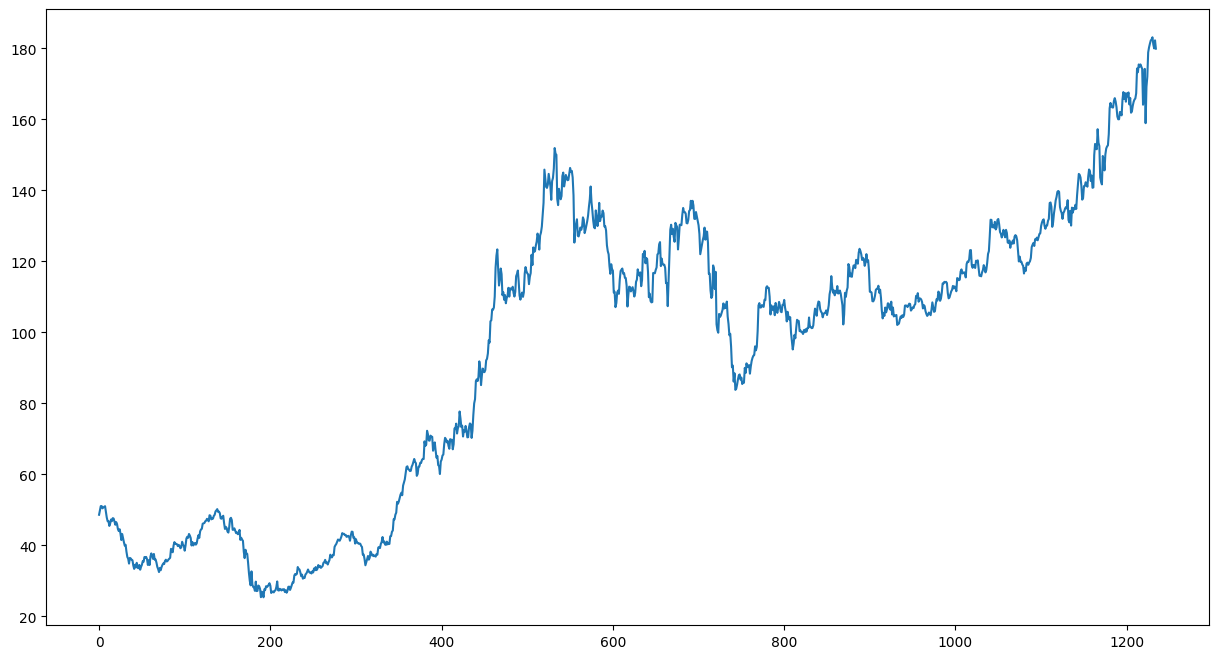

In [ ]:
plt.plot(df1)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(802, 433)

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(701, 100)
(701,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(332, 100)
(332,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
11/11 [==============================] - 11s 524ms/step - loss: 0.0752 - val_loss: 0.0034
Epoch 2/20
11/11 [==============================] - 2s 222ms/step - loss: 0.0124 - val_loss: 0.0062
Epoch 3/20
11/11 [==============================] - 2s 228ms/step - loss: 0.0060 - val_loss: 0.0114
Epoch 4/20
11/11 [==============================] - 2s 232ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 5/20
11/11 [==============================] - 3s 256ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 6/20
11/11 [==============================] - 4s 378ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 7/20
11/11 [==============================] - 2s 228ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 8/20
11/11 [==============================] - 2s 218ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/20
11/11 [==============================] - 2s 218ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/20
11/11 [==============================] - 2s 220ms/step - loss: 0.0018 - val_loss: 0.002

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 42ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)), math.sqrt(mean_squared_error(ytest,test_predict))

(90.72272840666413, 127.2020159474694)

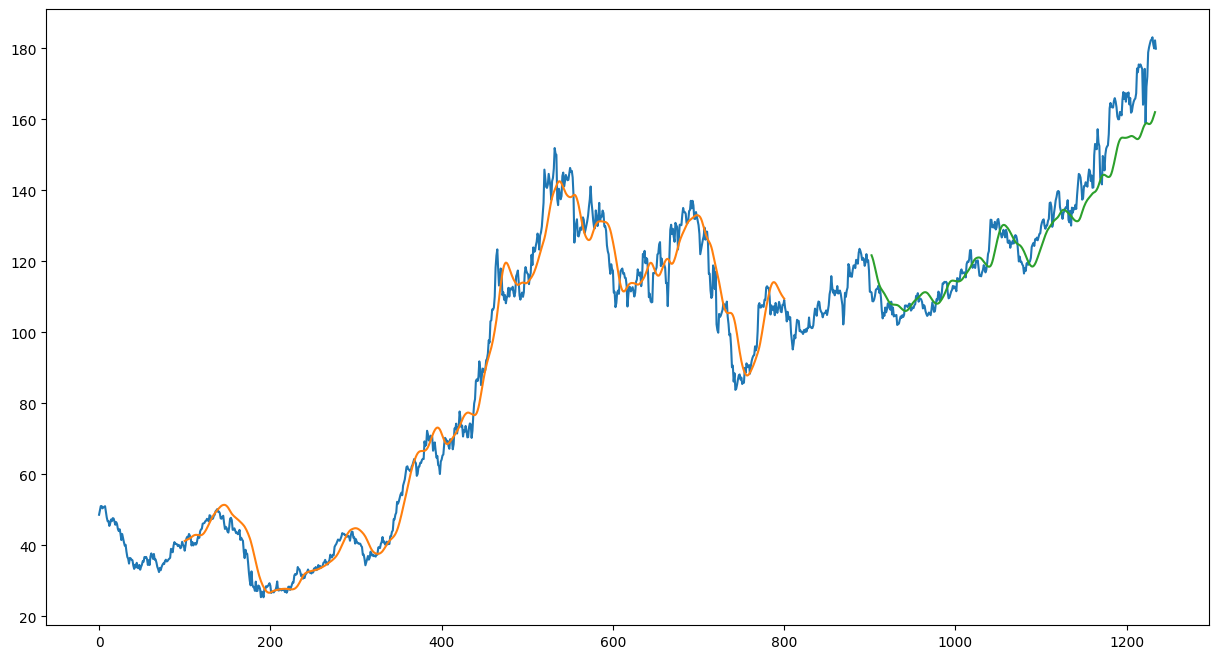

In [ ]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

433

In [ ]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<10):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.87543625]
101
1 day input [0.69576928 0.68689592 0.6948186  0.69291714 0.70083981 0.69355099
 0.7182697  0.73633343 0.75598161 0.75439708 0.74964347 0.7347489
 0.7100301  0.71288233 0.73411505 0.73411505 0.74108704 0.73886865
 0.73316436 0.75122801 0.76390429 0.76105214 0.74330533 0.75312947
 0.7312629  0.73189675 0.78957377 0.80953897 0.80161629 0.80003176
 0.83584221 0.81175726 0.80573605 0.74964347 0.74203772 0.73728412
 0.78798924 0.78196802 0.76231975 0.79052455 0.80129937 0.8051022
 0.80700366 0.82696885 0.8732372  0.88274441 0.87640627 0.87482174
 0.8745049  0.88623041 0.89130094 0.88527972 0.87545559 0.85865955
 0.85358902 0.85358902 0.86658223 0.86499769 0.86056092 0.88844879
 0.90207576 0.89003333 0.9001743  0.8849628  0.89985746 0.89447001
 0.901442   0.88020919 0.89161786 0.86531453 0.86753291 0.87767397
 0.88464587 0.88876572 0.89066709 0.89985746 0.94422444 0.93756938
 0.95151327 0.94739351 0.95151327 0.94771035 0.94359059 0.87957534
 0.89890669 0.94359059 0.84661703 0

In [ ]:
len(lst_output)

10

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [ ]:
len(df1)

1235

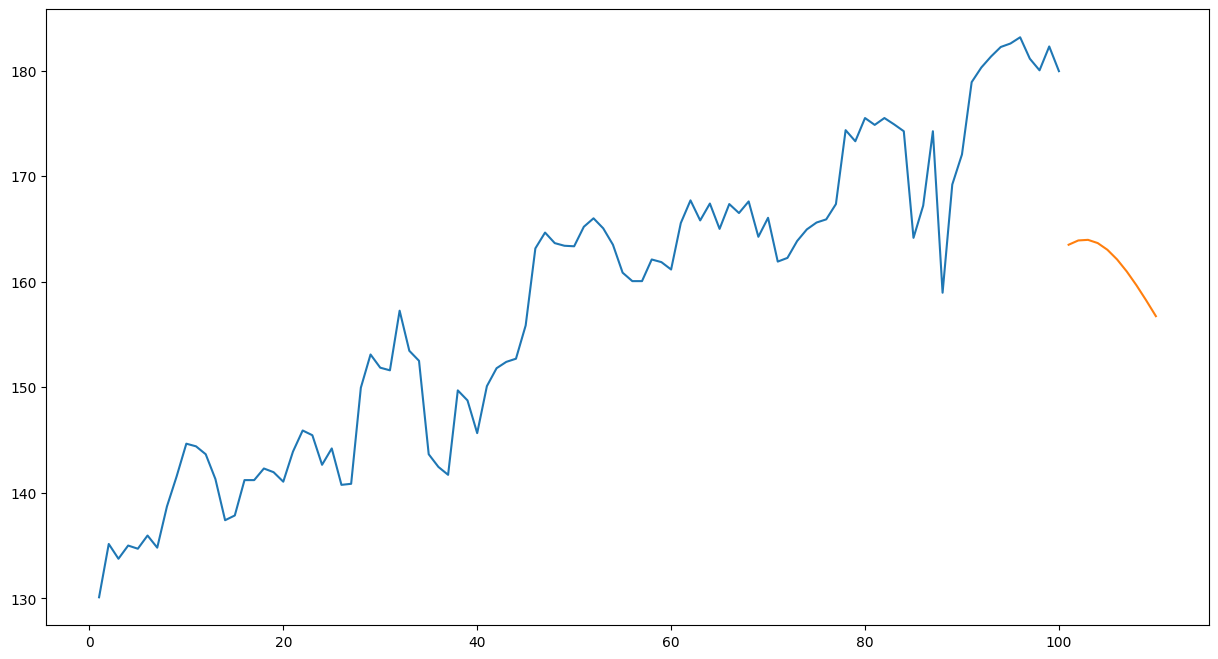

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

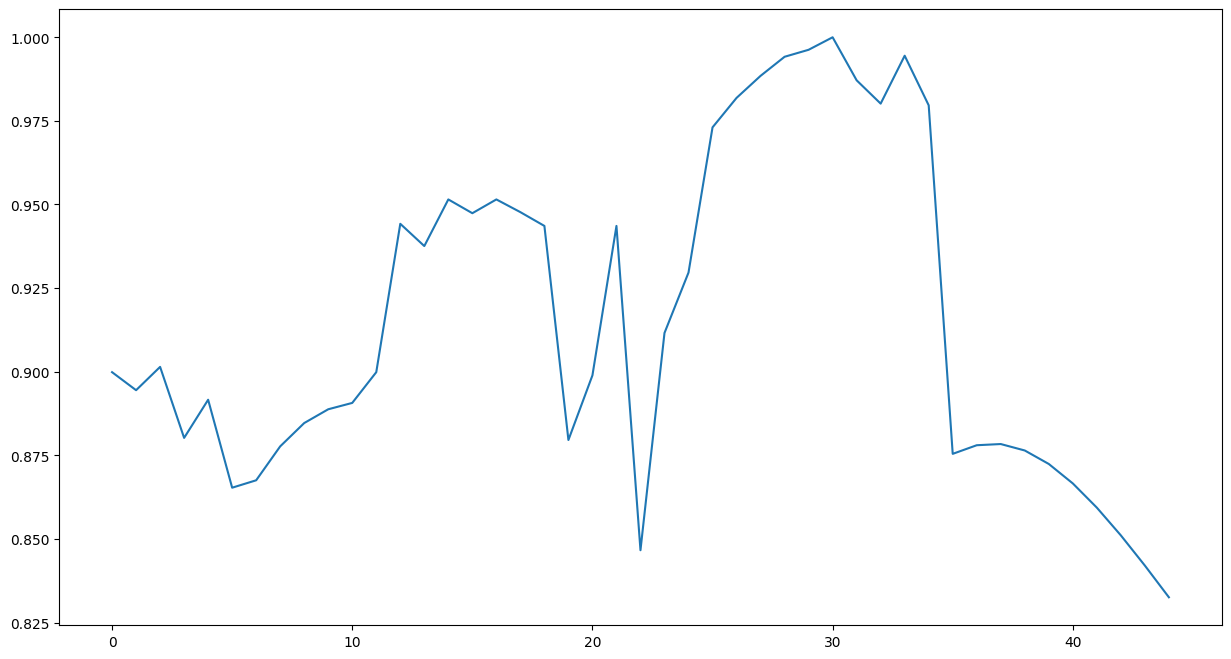

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

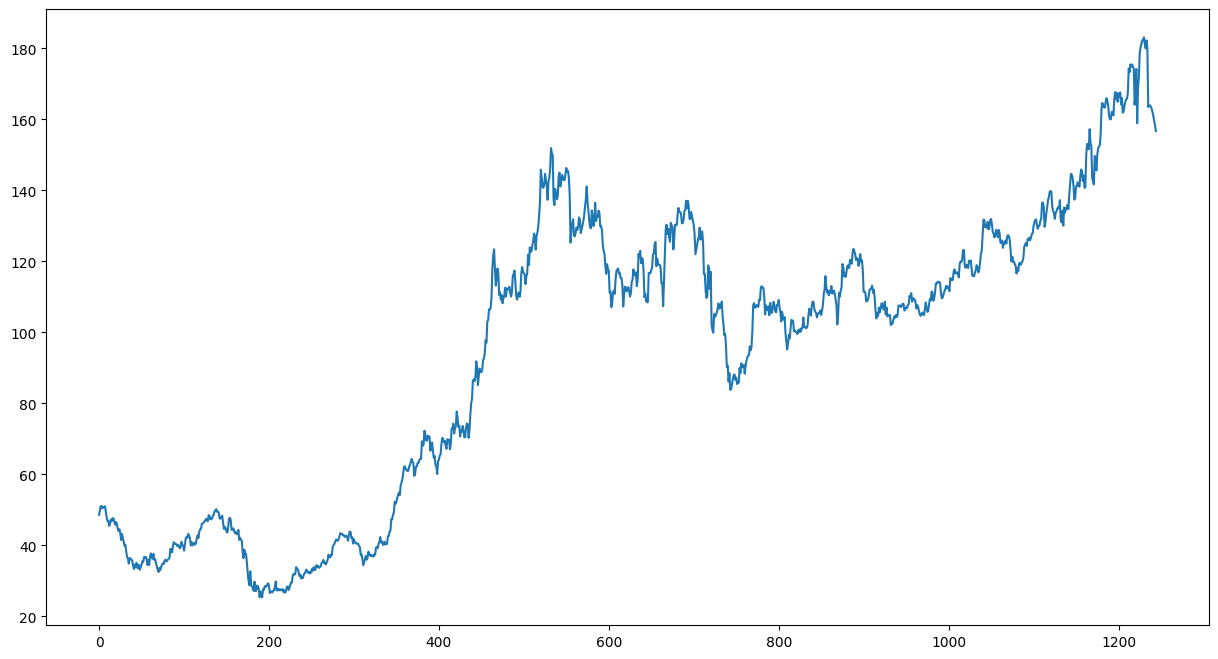

In [ ]:
plt.plot(df3)